### Decision Tree

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading the data
var=pd.read_csv('/Users/aneerbanchakraborty/Documents/data_science/text dataSets/diabetes.csv')

In [3]:
var.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking of null values
var.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
var.shape

(768, 9)

In [6]:
#feature
x=var.drop(columns='Outcome')

In [7]:
#label
y=var['Outcome']

In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
#importing function for splitting the data
from sklearn.model_selection import train_test_split

In [10]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [11]:
#sklearn features various classification, regression and clustering algorithms
from sklearn import tree

In [12]:
#creating a decision tree classifier
d_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [13]:
d_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Various hyperparameters can be set while creating the classifier. This would increase the accuracy by giving a better fit to our data. For now the hyperparameters are set to default except for criterion and max_depth.

In [14]:
#fitting the classifier
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
#predicting for the test data
y_pred=d_tree.predict(x_test)

In [16]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [17]:
#for evaluating model
from sklearn import metrics

In [18]:
#printing the accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7272727272727273


In [19]:
#confution metrix is the tabular summary of the number of correct and incorrect predictions made by our classifier.
metrics.confusion_matrix(y_test,y_pred)

array([[44,  6],
       [15, 12]])

In [20]:
y_train_pred=d_tree.predict(x_train)
metrics.confusion_matrix(y_train,y_train_pred)

array([[404,  46],
       [ 62, 179]])

#### RFE (Recursive Feature Elimination)

In [21]:
#RFE is recursive feature elimination
from sklearn.feature_selection import RFE

#RFE takes estimator as the first parameter, the estimator should have a fit method
#the second parameter is the number of features to select
#the third parameter is the step. Here step = 1 therefore 1 feature will be removed at each iteration
selector=RFE(d_tree,3,step=1)

In [22]:
selector=selector.fit(x,y)

In [23]:
#the number of selected features
selector.n_features_

3

In [24]:
#selected features are assigned rank 1.
selector.ranking_

array([5, 1, 3, 6, 4, 1, 2, 1])

Results are undewhelming and model is overfit. Hence we check correlation.

In [25]:
#Checking correlation
cor_mat=var.corr(method='pearson')

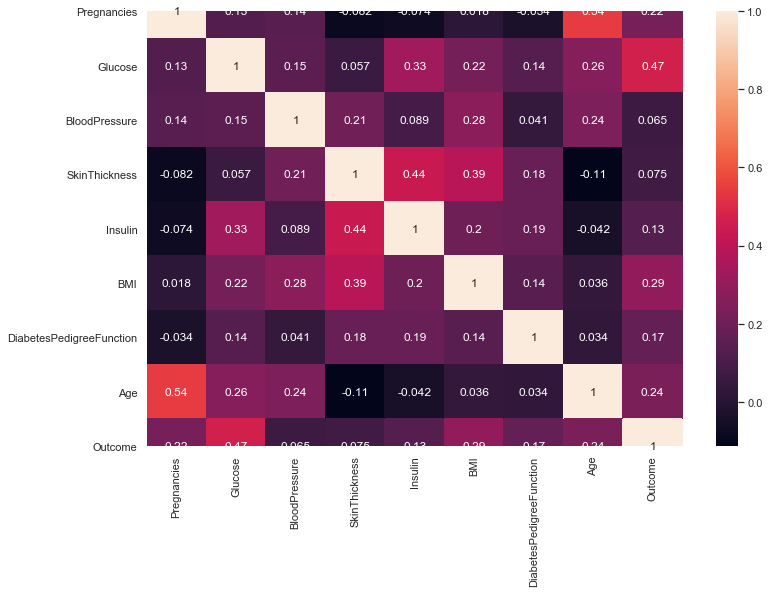

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(cor_mat,annot=True)
plt.show()

Now checking the Outcome column we find out that,
Glucose and BMI has the highest positive correlation with outcome
SkinThickness and BloodPressure has the lowest positive correlation with outcome

In [27]:
x=var[['Glucose','BloodPressure','BMI','SkinThickness']]

In [28]:
d_t=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [30]:
d_t.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
y_pred=d_t.predict(x_test)

In [32]:
print(metrics.accuracy_score(y_test, y_pred))

0.8181818181818182


In [33]:
metrics.confusion_matrix(y_test,y_pred)

array([[55,  3],
       [11,  8]])